# Code to compare Price of product on two different E-commerce websites.

# Lazada Website

In [393]:
# Important libraries
# for web scraping
from selenium import webdriver
from selenium.common.exceptions import *

# for data manipulation
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
# url of website to parse
url = 'https://www.lazada.com.my' 

# product to parse
search_item = 'Nescafe Gold refill 170g'

In [395]:
# custom chrome options
options = webdriver.ChromeOptions()

# options.add_argument('--headless') 
options.add_argument('start-maximized') 
options.add_argument('disable-infobars')
options.add_argument('--disable-extensions')

# open the browser
driver = webdriver.Chrome()
driver.get(url)

# find the search bar
search_bar = driver.find_element_by_id('q')
search_bar.send_keys(search_item)
click_button = driver.find_element_by_xpath('//*[@id="topActionHeader"]/div/div[2]/div/div[2]/form/div/div[2]/button')
click_button.click()

# find the products titles and prices
item_titles = driver.find_elements_by_class_name('c16H9d')
item_prices = driver.find_elements_by_class_name('c13VH6')


In [396]:
# empty lists
titles_list, prices_list = [], []

# loopover the previous list elements
for title in item_titles:
    titles_list.append(title.text)
for price in item_prices:
    prices_list.append(price.text)
    
# the values in the titles_list and prices_list
print(titles_list)
print(prices_list)

['NESCAFE Gold Coffee Refill 170g', 'Nescafe Gold Refill Pack 170g', 'NESCAFE GOLD Refill 170g x3 packs', 'SHOPPA Nescafe Gold Refill Pack - Rich & Smooth | 170g x 2', '[buy 3 get extra discount] NESCAFE GOLD Refill Twin Pack(170g x 2 Packs)', 'NESCAFE GOLD Refill Twin Pack 170g X 2', 'NESCAFE GOLD REFILL 170g EXP 06/2021', 'Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )', 'NESCAFE GOLD Refill 170g x2 packs', 'SHOPPA Nescafe Gold Refill Pack - Rich & Smooth | 170g', 'NESCAFE GOLD Refill (170g)', '[EXPIRY 2021] NESCAFE Gold Refill Pack 170g x 2 - NEW PACKAGING!', 'NESCAFE GOLD Refill 170g x3 packs', 'NESCAFE GOLD Refill 170g', 'NESTLE NESCAFE GOLD Refill (170g x 2 Packs)', 'NESCAFE GOLD Refill 170g x2 packs', 'NESCAFE Gold Refill Twin Pack x 170g', 'NESCAFE GOLD Refill 170g', 'Nescafe Gold Refill (170g x 2 Promo)', 'Nescafe Gold Refill Packs (170g x 2 Packs)', 'NESCAFE GOLD Refill - 170g', 'NESCAFE GOLD Refill 170g', 'NESCAFE GOLD Refill 170g x2 packs', 'Nescafe Gold Refill 170g', 'NES

In [397]:
# if items are also available on the next page we have to check for it
try:
    driver.find_element_by_xpath('/html/body/div[3]/div/div[2]/div[1]/div/div[1]/div[3]/div/ul/li[6]/a').click()
except NoSuchElementException:
    driver.quit()

In [398]:
# now analyze the data
df = pd.DataFrame(zip(titles_list, prices_list), columns = ['ItemName', 'Price'])
print(df)

                                             ItemName    Price
0                     NESCAFE Gold Coffee Refill 170g  RM21.50
1                       Nescafe Gold Refill Pack 170g  RM25.50
2                   NESCAFE GOLD Refill 170g x3 packs  RM27.99
3   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  RM80.29
4   [buy 3 get extra discount] NESCAFE GOLD Refill...  RM42.00
5              NESCAFE GOLD Refill Twin Pack 170g X 2  RM56.00
6                NESCAFE GOLD REFILL 170g EXP 06/2021  RM42.99
7     Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )  RM42.00
8                   NESCAFE GOLD Refill 170g x2 packs  RM56.99
9   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  RM20.88
10                         NESCAFE GOLD Refill (170g)  RM27.00
11  [EXPIRY 2021] NESCAFE Gold Refill Pack 170g x ...  RM21.00
12                  NESCAFE GOLD Refill 170g x3 packs  RM26.00
13                           NESCAFE GOLD Refill 170g  RM41.95
14        NESTLE NESCAFE GOLD Refill (170g x 2 Packs)  

In [399]:
# check the info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ItemName  29 non-null     object
 1   Price     29 non-null     object
dtypes: object(2)
memory usage: 592.0+ bytes


In [400]:
# change the datatype of Price column from object to float
df['Price'] = df['Price'].str.replace('RM', '').astype(float)

In [401]:
# drop the result items which contains x 2 in it
df = df[df['ItemName'].str.contains('x{23} | x 2') == False]
print(df)

                                             ItemName  Price
0                     NESCAFE Gold Coffee Refill 170g  21.50
1                       Nescafe Gold Refill Pack 170g  25.50
2                   NESCAFE GOLD Refill 170g x3 packs  27.99
5              NESCAFE GOLD Refill Twin Pack 170g X 2  56.00
6                NESCAFE GOLD REFILL 170g EXP 06/2021  42.99
7     Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )  42.00
8                   NESCAFE GOLD Refill 170g x2 packs  56.99
9   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  20.88
10                         NESCAFE GOLD Refill (170g)  27.00
12                  NESCAFE GOLD Refill 170g x3 packs  26.00
13                           NESCAFE GOLD Refill 170g  41.95
15                  NESCAFE GOLD Refill 170g x2 packs  22.88
16               NESCAFE Gold Refill Twin Pack x 170g  28.00
17                           NESCAFE GOLD Refill 170g  21.50
20                         NESCAFE GOLD Refill - 170g  54.00
21                      

In [402]:
# look for the condition that result items contain 170g in it
df = df[df['ItemName'].str.contains('170g') == True]
print(df)

                                             ItemName  Price
0                     NESCAFE Gold Coffee Refill 170g  21.50
1                       Nescafe Gold Refill Pack 170g  25.50
2                   NESCAFE GOLD Refill 170g x3 packs  27.99
5              NESCAFE GOLD Refill Twin Pack 170g X 2  56.00
6                NESCAFE GOLD REFILL 170g EXP 06/2021  42.99
7     Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )  42.00
8                   NESCAFE GOLD Refill 170g x2 packs  56.99
9   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  20.88
10                         NESCAFE GOLD Refill (170g)  27.00
12                  NESCAFE GOLD Refill 170g x3 packs  26.00
13                           NESCAFE GOLD Refill 170g  41.95
15                  NESCAFE GOLD Refill 170g x2 packs  22.88
16               NESCAFE Gold Refill Twin Pack x 170g  28.00
17                           NESCAFE GOLD Refill 170g  21.50
20                         NESCAFE GOLD Refill - 170g  54.00
21                      

In [403]:
# add a new column to dataframe
df['Platform'] = 'Lazada'
print(df)

                                             ItemName  Price Platform
0                     NESCAFE Gold Coffee Refill 170g  21.50   Lazada
1                       Nescafe Gold Refill Pack 170g  25.50   Lazada
2                   NESCAFE GOLD Refill 170g x3 packs  27.99   Lazada
5              NESCAFE GOLD Refill Twin Pack 170g X 2  56.00   Lazada
6                NESCAFE GOLD REFILL 170g EXP 06/2021  42.99   Lazada
7     Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )  42.00   Lazada
8                   NESCAFE GOLD Refill 170g x2 packs  56.99   Lazada
9   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  20.88   Lazada
10                         NESCAFE GOLD Refill (170g)  27.00   Lazada
12                  NESCAFE GOLD Refill 170g x3 packs  26.00   Lazada
13                           NESCAFE GOLD Refill 170g  41.95   Lazada
15                  NESCAFE GOLD Refill 170g x2 packs  22.88   Lazada
16               NESCAFE Gold Refill Twin Pack x 170g  28.00   Lazada
17                  

In [404]:
# sort the index values from 0 to number of values in dataframe
df.index = range(len(df.index))
print(df)

                                             ItemName  Price Platform
0                     NESCAFE Gold Coffee Refill 170g  21.50   Lazada
1                       Nescafe Gold Refill Pack 170g  25.50   Lazada
2                   NESCAFE GOLD Refill 170g x3 packs  27.99   Lazada
3              NESCAFE GOLD Refill Twin Pack 170g X 2  56.00   Lazada
4                NESCAFE GOLD REFILL 170g EXP 06/2021  42.99   Lazada
5     Nescafe Gold Refill Pack 170g ( Exp 2021 SEPT )  42.00   Lazada
6                   NESCAFE GOLD Refill 170g x2 packs  56.99   Lazada
7   SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  20.88   Lazada
8                          NESCAFE GOLD Refill (170g)  27.00   Lazada
9                   NESCAFE GOLD Refill 170g x3 packs  26.00   Lazada
10                           NESCAFE GOLD Refill 170g  41.95   Lazada
11                  NESCAFE GOLD Refill 170g x2 packs  22.88   Lazada
12               NESCAFE Gold Refill Twin Pack x 170g  28.00   Lazada
13                  

In [405]:
# describe the numerical column vlaues in dataframe
df.describe()

,Price
count,22.000000
mean,37.381818
std,15.936078
min,20.880000
25%,25.625000
50%,28.995000
75%,47.400000
max,80.280000


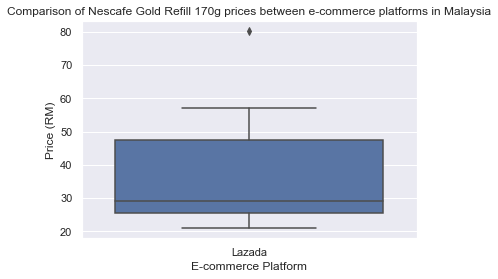

In [406]:
# plot the chart of price values 
sns.set()
_ = sns.boxplot(x = 'Platform', y = 'Price', data = df)
_ = plt.title('Comparison of Nescafe Gold Refill 170g prices between e-commerce platforms in Malaysia')
_ = plt.ylabel('Price (RM)')
_ = plt.xlabel('E-commerce Platform')

# show the plot
plt.show()

# Shopee website scrape using an API

In [407]:
# requests library for web scraping
import requests
import re

In [408]:
# website url
Shopee_url = 'https:://www.shopee.com.my'

# product we want to search
key_word_search = 'Nescafe Gold refill 170g'

# headers to pass to website call
headers = {
 'User-Agent': 'Chrome',
 'Referer': '{}search?keyword={}'.format(Shopee_url, key_word_search)
}

# API to search our product
url = 'https://shopee.com.my/api/v2/search_items/?by=relevancy&keyword={}&limit=100&newest=0&order=desc&page_type=search'.format(key_word_search)

# now we do a shopee API request
r = requests.get(url, headers = headers).json()

# shopee scraping script
titles_list = []
prices_list = []
for item in r['items']:
    titles_list.append(item['name'])
    prices_list.append(item['price_min'])

In [409]:
# create dataframe from the collected titles and price list
shopee = pd.DataFrame(zip(titles_list, prices_list), columns = ['ItemName', 'Price'])

In [410]:
# add another column
shopee['Platform'] = 'Shopee'

In [411]:
# update the price and remove items which are not of weight 170g
shopee['Price'] /= 100000
shopee = shopee[shopee['ItemName'].str.contains('170g') == True]

# also remove x2 items
shopee = shopee[shopee['ItemName'].str.contains('[2x\s]{3}|twin', flags=re.IGNORECASE,regex=True) == False]

In [412]:
print(shopee)

                                             ItemName  Price Platform
3                          NESCAFE GOLD Refill (170g)  21.90   Shopee
4                          NESCAFE GOLD Refill (170g)  21.90   Shopee
10                           Nescafe Gold Refill 170g  20.90   Shopee
12              NESCAFE GOLD Refill 170g (exp 7/2021)  23.90   Shopee
14                           Nescafe Gold Refill 170g  20.20   Shopee
15             🔥FreeShipping🔥NESCAFE GOLD Refill 170g  22.80   Shopee
18                           NESCAFE GOLD Refill 170g  22.59   Shopee
21     Nestle Nescafe Gold Blend Refill 170g tri-pack  67.00   Shopee
23                           Nescafe Gold refill 170g  22.20   Shopee
24                           Nescafe gold refill 170g  23.50   Shopee
25              NESCAFE GOLD Refill 170g【Ready Stock】  20.00   Shopee
28  SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  22.88   Shopee
29                         Nescafe Gold Refill (170g)  26.78   Shopee
30           NESCAFE

In [413]:
# update index values
shopee.index = range(len(shopee.index))
print(shopee)

                                             ItemName  Price Platform
0                          NESCAFE GOLD Refill (170g)  21.90   Shopee
1                          NESCAFE GOLD Refill (170g)  21.90   Shopee
2                            Nescafe Gold Refill 170g  20.90   Shopee
3               NESCAFE GOLD Refill 170g (exp 7/2021)  23.90   Shopee
4                            Nescafe Gold Refill 170g  20.20   Shopee
5              🔥FreeShipping🔥NESCAFE GOLD Refill 170g  22.80   Shopee
6                            NESCAFE GOLD Refill 170g  22.59   Shopee
7      Nestle Nescafe Gold Blend Refill 170g tri-pack  67.00   Shopee
8                            Nescafe Gold refill 170g  22.20   Shopee
9                            Nescafe gold refill 170g  23.50   Shopee
10              NESCAFE GOLD Refill 170g【Ready Stock】  20.00   Shopee
11  SHOPPA Nescafe Gold Refill Pack - Rich & Smoot...  22.88   Shopee
12                         Nescafe Gold Refill (170g)  26.78   Shopee
13           NESCAFE

In [414]:
# concat both the dataframes
master_df = pd.concat([df, shopee])

# update the index of master dataframes
master_df.index = range(len(master_df.index))
master_df

,ItemName,Price,Platform
0,NESCAFE Gold Coffee Refill 170g,21.50,Lazada
1,Nescafe Gold Refill Pack 170g,25.50,Lazada
2,NESCAFE GOLD Refill 170g x3 packs,27.99,Lazada
3,NESCAFE GOLD Refill Twin Pack 170g X 2,56.00,Lazada
4,NESCAFE GOLD REFILL 170g EXP 06/2021,42.99,Lazada
...,...,...,...
62,NESCAFE GOLD Refill Pack (170g) Expiry: 08/2021,45.00,Shopee
63,NESCAFE Gold Refill 170g (NEW packing),31.90,Shopee
64,Nescafe Gold Refill Packs 170g (Ready Stock),20.90,Shopee
65,Nestle Nescafe Gold Blend Refill 170g,23.50,Shopee


In [415]:
print(master_df.groupby(['Platform']).describe())

         Price                                                          
         count       mean        std    min     25%     50%   75%    max
Platform                                                                
Lazada    22.0  37.381818  15.936078  20.88  25.625  28.995  47.4  80.28
Shopee    45.0  27.607111  11.180425  20.00  21.900  23.500  27.9  70.99


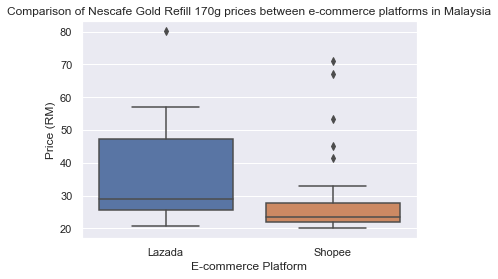

In [416]:
# now do ploting
sns.set()
_ = sns.boxplot(x='Platform', y='Price',data=master_df)
_ = plt.title('Comparison of Nescafe Gold Refill 170g prices between e-commerce platforms in Malaysia')
_ = plt.ylabel('Price (RM)')
_ = plt.xlabel('E-commerce Platform')

# Show the plot
plt.show()

#### This graph shows that Shopee website is a cheaper platform to buy the products with more number of items.